In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

We will use a small dataset to implement linear regression.

In [36]:
data = pd.read_excel("C:\\Users\\Admin\\Desktop\\dataset.xlsx") #Importing the data

In [37]:
print(data)

            X          Y
0   20.000000  88.599998
1   16.000000  71.599998
2   19.799999  93.300003
3   18.400000  84.300003
4   17.100000  80.599998
5   15.500000  75.199997
6   14.700000  69.699997
7   17.100000  82.000000
8   15.400000  69.400002
9   16.200001  83.300003
10  15.000000  79.599998
11  17.200001  82.599998
12  16.000000  80.599998
13  17.000000  83.500000
14  14.400000  76.300003


The Y column represent the temperature in Fahrenheit while the X column represents the number of chirps per second of the stripped ground cricket.

In [38]:
type(data)

pandas.core.frame.DataFrame

In [39]:
X = np.array(data.X) #Converting each column into an array
Y = np.array(data.Y)
print(X) #Feature
print(Y) #Target

[20.         16.         19.79999924 18.39999962 17.10000038 15.5
 14.69999981 17.10000038 15.39999962 16.20000076 15.         17.20000076
 16.         17.         14.39999962]
[88.59999847 71.59999847 93.30000305 84.30000305 80.59999847 75.19999695
 69.69999695 82.         69.40000153 83.30000305 79.59999847 82.59999847
 80.59999847 83.5        76.30000305]


In [40]:
type(X)

numpy.ndarray

In [41]:
def plot_points(X,Y,xlabel,ylabel):
    plt.plot(X,Y,"o")
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

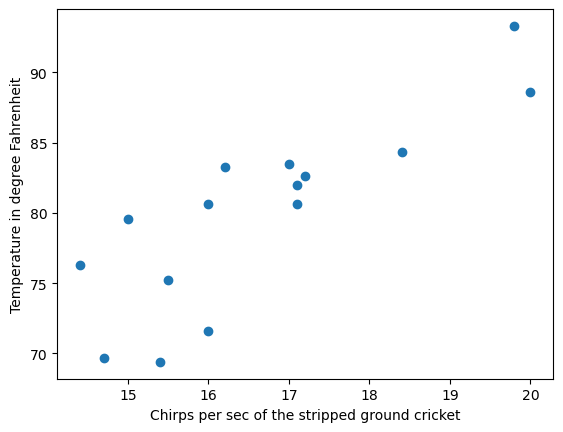

In [42]:
plot_points(X,Y,"Chirps per sec of the stripped ground cricket","Temperature in degree Fahrenheit")

Linear Regression involves creating a linear relationship between the target and the feature. Therefore, a line should be drawn in the above graph that perfectly passes across the data points. The lesser the distance between the data point and the line, lesser the error, more the accuracy.

The equation of a line is given by y=mx+c

m=slope/weight

c=intercept/bias

In [43]:
np.random.seed(2)
theta = np.random.rand(2,1) #Creates a random [2,1] array. Represents the slope and intercept value
# hypothesis of model
def hypothesis(X, theta):
    """Predicts target given input feature and theta"""
    return theta[0] + theta[1] * X #c + mx

In [44]:
def draw_line(theta):
    """Plot a line from slope and intercept"""
    axes = plt.gca() #Either get a reference to the current axis or plot a new graph if there are no plots from before
    x_vals = np.array(axes.get_xlim()) #Returns the x limits(lowest and highest x values)
    y_vals = hypothesis(x_vals, theta)
    plt.plot(x_vals, y_vals, '--')

In [45]:
def draw_points_and_lines(X, y, xlabel, ylabel, theta):
    """Draws lines and points"""
    plot_points(X, y, xlabel, ylabel)
    draw_line(theta)

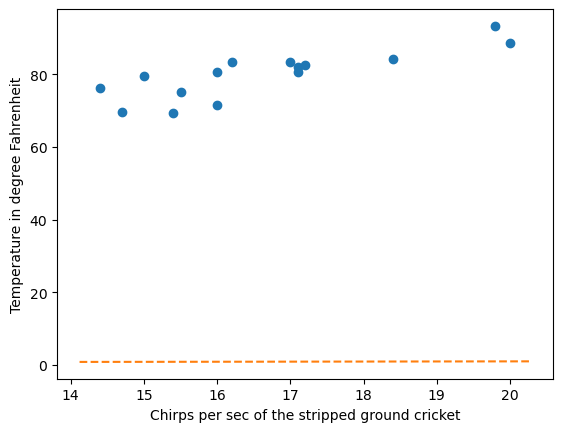

In [46]:
draw_points_and_lines(X, Y, "Chirps per sec of the stripped ground cricket", "Temperature in degree Fahrenheit", theta)

We have drawn a random Line of Regression. Now we will adjust its parameters(weights and biases) to get accurate predictions

In [47]:
m = len(X) #Number of data points
def cost(X, y, theta):
    """Returns cost"""
    return (1/(2*m)) * np.sum((hypothesis(X, theta) - y) ** 2)
#Summation of the difference between the point on the line and actual data squared

In [48]:
cost(X,Y,theta)

3154.8870744571304

The Gradient Descent Algorithm is used to minimize errors and optimize the model

In [49]:
def gradient_descent(X, y, theta, alpha, steps):
    for i in range(steps):
        old_cost = cost(X, y, theta)
        temp0 = theta[0] - alpha * ((1/m) * np.sum(hypothesis(X, theta) - y)) #alpha is the learning rate
        temp1 = theta[1] - alpha * ((1/m) * np.dot((hypothesis(X, theta) - y), X))
        theta[0] = temp0
        theta[1] = temp1
        new_cost = cost(X, y, theta)
        if new_cost > old_cost:
            print("WARNING!!! COST INCREASING", new_cost)
        else:
            print("Cost Decresing", new_cost)

In [50]:
gradient_descent(X, Y, theta, alpha=0.001, steps=100)
print(theta) #The final values of slope and intercept

Cost Decresing 1635.2977297675818
Cost Decresing 849.7898307803341
Cost Decresing 443.74415710903946
Cost Decresing 233.85053343835588
Cost Decresing 125.35205308530111
Cost Decresing 69.26686684984337
Cost Decresing 40.275220900407845
Cost Decresing 25.288798961439458
Cost Decresing 17.541973528482107
Cost Decresing 13.537448649531214
Cost Decresing 11.467398078189143
Cost Decresing 10.397318191652165
Cost Decresing 9.84414430227494
Cost Decresing 9.558170056057687
Cost Decresing 9.410316957257288
Cost Decresing 9.33386160137713
Cost Decresing 9.294313249413898
Cost Decresing 9.27384290888777
Cost Decresing 9.26323439649766
Cost Decresing 9.257723672170306
Cost Decresing 9.254848102831042
Cost Decresing 9.253334701358167
Cost Decresing 9.252525433784397
Cost Decresing 9.252080148434466
Cost Decresing 9.251823013713082
Cost Decresing 9.25166313854976
Cost Decresing 9.251553539427785
Cost Decresing 9.251469929573634
Cost Decresing 9.251399754640376
Cost Decresing 9.251336525020578
Cost 

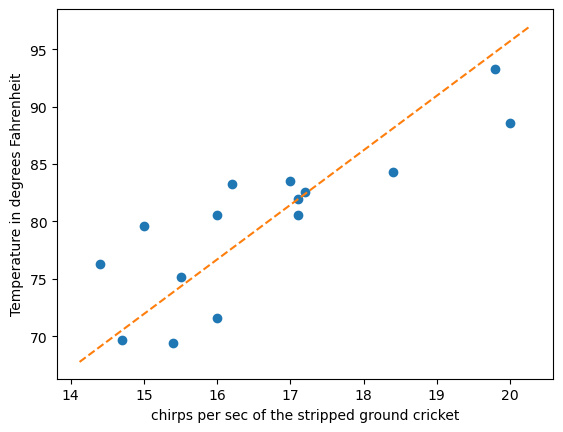

In [51]:
draw_points_and_lines(X, Y, "chirps per sec of the stripped ground cricket", "Temperature in degrees Fahrenheit", theta)

Its clearly visible that the line fits the points more or less perfectly.

# Prediction

In [52]:
x = np.array([14.9]) 
hypothesis(x, theta)

array([71.48017697])

So if the chirps/sec are 14.9, the temperature is 71.48 Faharenheit